### KNN with Minkowski distance

##### Sathvik B - 1MS17CS148
##### Sathvik K P- 1MS17CS143

##### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

##### Loading the dataset

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##### Finding if any columns have NaN values

In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### Dropping Id field as it does not help in prediction

In [5]:
df.drop(['Id'],axis=1, inplace=True)

Text(3.8, 4.5, 'setosa')

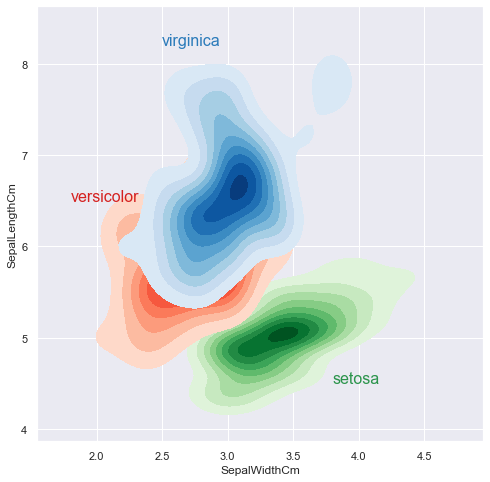

In [6]:
sns.set(style='darkgrid')
setosa = df.query("Species=='Iris-setosa'")
versicolor = df.query("Species=='Iris-versicolor'")
virginica = df.query("Species=='Iris-virginica'")
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(setosa.SepalWidthCm, setosa.SepalLengthCm, cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.SepalWidthCm, versicolor.SepalLengthCm, cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.SepalWidthCm, virginica.SepalLengthCm, cmap="Blues",
          shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(1.8, 6.5, "versicolor", size=16, color=red)
ax.text(3.8, 4.5, "setosa", size=16, color=green)

##### Conversion from categorical to numerical

In [7]:
df['Species'] = df['Species'].apply(lambda x: 0 if x=='Iris-setosa' else (1 if x=='Iris-versicolor' else 2))

##### Splitting into train and test datasets

In [8]:
X=df.drop(['Species'],axis=1)
y=df['Species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Fitting the KNN classifier with Minkowski distance metric

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

##### Predicting on test dataset

In [11]:
y_pred = neigh.predict(X_test)

##### Confusion matrix and accuracy

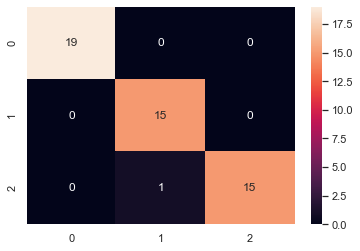

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [13]:
print(accuracy_score(y_test,y_pred))

0.98


##### As we can see, the testing accuracy is 98%, this means that our model has fit the dataset well